# SyriaTel Customer Churn Prediction

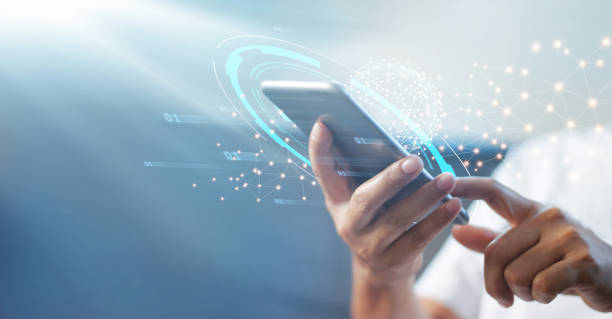

## Overview

For Telco companies it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.
The churn metric is expressed as the percentage of customers who cancel their contract or subscription within a specific period, typically a month. For example, if SyriaTel had 10 million customers at the beginning of January and 500,000 customers terminated their contracts by the end of January, the monthly churn rate for January would be 5%.
This project is geared towards predicting and reducing customer churn for SyriaTel by analyzing customer behavior and applying machine learning models to identify high-risk customers and implement retention strategies.


## 1. Business UnderStanding

Problem Statement
SyriaTel is a prominent telecommunications provider in Syria, offering a range of services including mobile and fixed-line voice communication, data services, and broadband internet. The company aims to expand its market share and enhance customer satisfaction while maintaining a strong and competitive position in the telecom industry.
SyriaTel is facing a high churn rate, with many customers discontinuing their services and switching to competitors. The company wants to address this issue by developing a customer churn prediction model. By analyzing the dataset, SyriaTel aims to gain insights into factors associated with churn, with the goal of reducing churn rate, increasing customer retention, and improving overall profitability.

Specific Objectives
1. Identify the factors that are most likely to lead to customer churn.

2. Develop a model that can accurately predict which customers are at risk of churning.

3. Take proactive steps to retain customers who are at risk of churning.


## Success Metrics
- Developing a robust churn prediction model with high recall score of 0.8.

- Identifying the key features and factors that significantly contribute to customer churn.

- Providing actionable insights and recommendations to the telecom company for reducing churn and improving customer retention.
- Demonstrating the value of churn prediction models in enabling proactive retention strategies and reducing revenue  losses due to customer churn.

# Import libraries and packages

In [2]:

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('./data/bigml_59.csv')
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# **2. Exploratory data analysis** 

In [4]:
shape = df.shape
print(f"The DataFrame has {shape[0]} rows and {shape[1]} columns.")

The DataFrame has 3333 rows and 21 columns.


In [5]:
col_names = df.columns

col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Column Names and Descriptions:

Based on the column descriptions, below are further comments on some of them based on relevance for modelling or predicting house prices.
* **Id and Date:** These columns can be useful for identifying records and time-based analysis. However, they may not be directly useful for modeling.
* **Price:** This is the target variable we aim to predict.
* **Bedrooms and Bathrooms:** These are essential features representing the size and functionality of the house.
* **Square Footage:** The living area (sqft_living) and lot size (sqft_lot) are crucial features for predicting house prices.

In [6]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object or bool. Numerical variables have data type float64 or int64.


First of all, I will find categorical variables.

In [7]:
# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object', 'bool']).columns

# Print categorical variables
print("Categorical variables:")
print(categorical_vars)

Categorical variables:
Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')


In [8]:
# view the categorical variables

df[categorical_vars].head()

,state,phone number,international plan,voice mail plan,churn
0,KS,382-4657,no,yes,False
1,OH,371-7191,no,yes,False
2,NJ,358-1921,no,no,False
3,OH,375-9999,yes,no,False
4,OK,330-6626,yes,no,False
